In [1]:
import numpy as np
import time
from sklearn import mixture
from sklearn import neighbors, linear_model
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
data_num = 50
suc_data_mean = 2.
suc_data_covar = 1.
suc_grasp_configs = np.random.normal(suc_data_mean, suc_data_covar, data_num)
fail_data_mean = -2.
fail_data_covar = 1.
fail_grasp_configs = np.random.normal(fail_data_mean, fail_data_covar, data_num)

suc_grasp_labels = np.ones(data_num)
fail_grasp_labels = np.zeros(data_num)

grasp_configs = np.concatenate((suc_grasp_configs, fail_grasp_configs))
grasp_labels = np.concatenate((suc_grasp_labels, fail_grasp_labels))

In [3]:
grasp_configs = np.expand_dims(grasp_configs, axis=1)
print grasp_configs.shape, grasp_labels.shape
logistic = linear_model.LogisticRegression()
logistic.fit(grasp_configs, grasp_labels)
print logistic.coef_
print logistic.intercept_
print logistic.n_iter_
pred_train = logistic.predict(grasp_configs)
np.sum((pred_train > 0.5) == grasp_labels)

(100, 1) (100,)
[[2.44688984]]
[0.04871846]
[6]


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


98

In [4]:
num_components = 2
g = mixture.GaussianMixture(n_components=num_components, covariance_type='full', 
        random_state=0, init_params='kmeans', n_init=5)
g.fit(grasp_configs)
#pred_prob = g.predict_proba(grasp_configs)
#print pred_prob
#print g.score_samples(grasp_configs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=5, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

(1000,)


<Figure size 432x288 with 0 Axes>

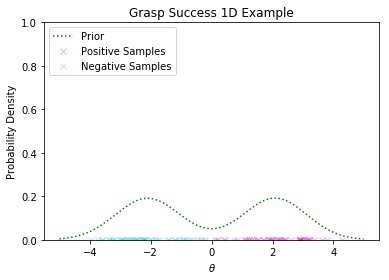

In [14]:
configs_raw = np.arange(-5., 5., 0.01)
configs = np.expand_dims(configs_raw, axis=1)
pred_suc_prob = logistic.predict_proba(configs)[:, 1]
#pred_prior_prob = g.predict_proba(configs)
#print pred_suc_prob.shape, pred_prior_prob.shape

log_prior = g.score_samples(configs)
print log_prior.shape
prior = np.exp(log_prior)

posterior = pred_suc_prob * prior

plt.clf()
plt.figure()
axes = plt.gca()
axes.set_ylim([0, 1])
plt.plot(configs_raw, pred_suc_prob, 'r--')
plt.plot(configs_raw, prior, 'g:')
plt.plot(configs_raw, 2*posterior, 'b')
plt.xlabel('$\\theta$')
plt.ylabel('Probability Density')
plt.title('Grasp Success 1D Example')
# plt.legend(('Likelihood', 'Prior', 'Posterior'),
#            loc='upper left')

# plt.plot(suc_grasp_configs, np.zeros(len(suc_grasp_configs)),'mx', alpha=0.3)
# plt.plot(fail_grasp_configs, np.zeros(len(fail_grasp_configs)), 'cx', alpha=0.3)

# plt.legend(('Likelihood', 'Positive Samples', 'Negative Samples'),
#            loc='upper left')
# plt.legend(('Prior', 'Positive Samples', 'Negative Samples'),
#            loc='upper left')
plt.show()